### Here I performed EDA and built an supervised ML model with the scrapped data

#### The main purpose of the whole repo is to show my web scraping knowledge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('combined_data.csv')
data

,Title,Prices,Ratings,URL
0,A Light in the ...,Â£51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
1,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
2,Soumission,Â£50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
3,Sharp Objects,Â£47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
4,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
...,...,...,...,...
995,Alice in Wonderland (Alice's ...,Â£55.53,One,http://books.toscrape.com//media/cache/96/ee/9...
996,"Ajin: Demi-Human, Volume 1 ...",Â£57.06,Four,http://books.toscrape.com//media/cache/09/7c/0...
997,A Spy's Devotion (The ...,Â£16.97,Five,http://books.toscrape.com//media/cache/1b/5f/1...
998,1st to Die (Women's ...,Â£53.98,One,http://books.toscrape.com//media/cache/2b/41/2...


In [3]:
# Re-adjusting the index
data.index+=1


In [4]:
# Remove the currency symbol
data['Prices'] = data['Prices'].str.replace('Â£', '')

In [6]:
data.head()

,Title,Prices,Ratings,URL
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...


In [7]:
data['Ratings'] = data['Ratings'].map({'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5})

In [8]:
data.dtypes

Title      object
Prices     object
Ratings     int64
URL        object
dtype: object

In [9]:
data['Prices'] = data['Prices'].astype('float64')

In [10]:
data

,Title,Prices,Ratings,URL
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
...,...,...,...,...
996,Alice in Wonderland (Alice's ...,55.53,1,http://books.toscrape.com//media/cache/96/ee/9...
997,"Ajin: Demi-Human, Volume 1 ...",57.06,4,http://books.toscrape.com//media/cache/09/7c/0...
998,A Spy's Devotion (The ...,16.97,5,http://books.toscrape.com//media/cache/1b/5f/1...
999,1st to Die (Women's ...,53.98,1,http://books.toscrape.com//media/cache/2b/41/2...


In [11]:
data.describe()

,Prices,Ratings
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [14]:
data[data['Ratings'] == 5]

,Title,Prices,Ratings,URL
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
13,Set Me Free,17.46,5,http://books.toscrape.com//media/cache/5b/88/5...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
15,Rip it Up and ...,35.02,5,http://books.toscrape.com//media/cache/81/c4/8...
24,Chase Me (Paris Nights ...,25.27,5,http://books.toscrape.com//media/cache/9c/2e/9...
...,...,...,...,...
986,Deep Under (Walker Security ...,47.09,5,http://books.toscrape.com//media/cache/74/e4/7...
990,Bright Lines,39.07,5,http://books.toscrape.com//media/cache/12/43/1...
994,"Bleach, Vol. 1: Strawberry ...",34.65,5,http://books.toscrape.com//media/cache/a8/38/a...
998,A Spy's Devotion (The ...,16.97,5,http://books.toscrape.com//media/cache/1b/5f/1...


In [15]:
data.corr()

/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_4764/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Prices,Ratings
Prices,1.000000,0.028166
Ratings,0.028166,1.000000


/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_4764/1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

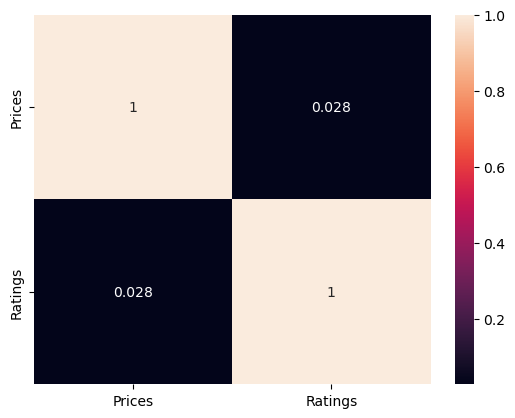

In [16]:
sns.heatmap(data.corr(), annot=True)

In [22]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np

In [20]:
x = data.iloc[:,1:3]
scaled_data = x.apply(zscore)

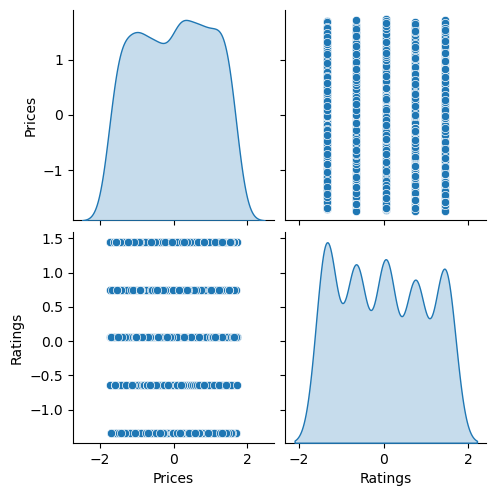

In [21]:
sns.pairplot(scaled_data, diag_kind='kde')

In [23]:
from scipy.spatial.distance import cdist #Compute distance between each pair of the two collectioons of inputs
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    
    model.fit(scaled_data)
    prediction = model.predict(scaled_data)
    
    meanDistortions.append(sum(np.min(cdist(scaled_data, model.cluster_centers_, 'euclidean'), axis=1))/ scaled_data.shape[0])

/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

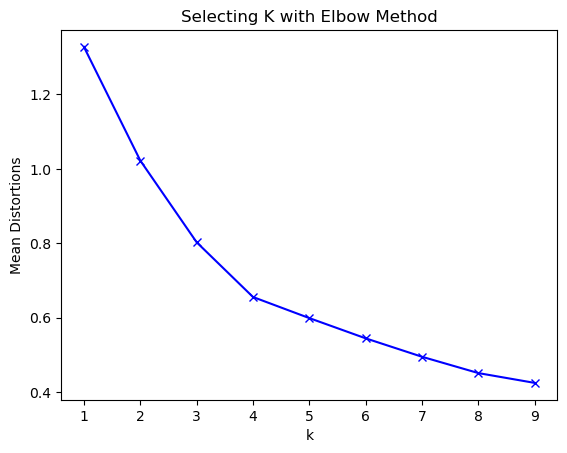

In [24]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Mean Distortions')
plt.title('Selecting K with Elbow Method')
plt.show()

In [26]:
final_model = KMeans(3)
final_model.fit(scaled_data)
prediction= final_model.predict(scaled_data)

/Users/appleplay/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
data['clusters'] = prediction
data.head()

,Title,Prices,Ratings,URL,clusters
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...,0
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...,1
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...,1
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...,0
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...,0


In [29]:
data[data['clusters']==1]

,Title,Prices,Ratings,URL,clusters
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...,1
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...,1
6,The Requiem Red,22.65,1,http://books.toscrape.com//media/cache/68/33/6...,1
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...,1
17,Olio,23.88,1,http://books.toscrape.com//media/cache/55/33/5...,1
...,...,...,...,...,...
989,Charity's Cross (Charles Towne ...,41.24,1,http://books.toscrape.com//media/cache/39/e0/3...,1
991,Bridget Jones's Diary (Bridget ...,29.82,1,http://books.toscrape.com//media/cache/0c/32/0...,1
995,Beyond Good and Evil,43.38,1,http://books.toscrape.com//media/cache/ab/45/a...,1
996,Alice in Wonderland (Alice's ...,55.53,1,http://books.toscrape.com//media/cache/96/ee/9...,1
